## Text-based Emotion Recogition

### Import packages

In [1]:
# data tools
# manpulate data
import pandas as pd
import numpy as np

# visualize data
import seaborn as sns

# clean text
import neattext.functions as nfx

In [2]:
# model tools
# estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Download Datasets

In [3]:
# load dataset
df = pd.read_csv("../data/emotion_dataset_raw.csv")
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [4]:
# Check data
df["Emotion"].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [5]:
# Check detail of dataset
df.describe

<bound method NDFrame.describe of         Emotion                                               Text
0       neutral                                             Why ? 
1           joy    Sage Act upgrade on my to do list for tommorow.
2       sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3           joy   Such an eye ! The true hazel eye-and so brill...
4           joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
...         ...                                                ...
34787  surprise  @MichelGW have you gift! Hope you like it! It'...
34788       joy  The world didnt give it to me..so the world MO...
34789     anger                           A man robbed me today . 
34790      fear  Youu call it JEALOUSY, I call it of #Losing YO...
34791   sadness  I think about you baby, and I dream about you ...

[34792 rows x 2 columns]>

In [6]:
# check detail of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


<AxesSubplot:xlabel='Emotion', ylabel='count'>

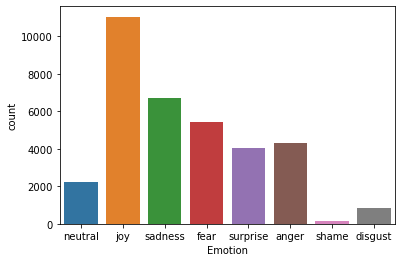

In [7]:
# Visualize emotion distribution
sns.countplot(data=df, x="Emotion")

### Data Preaparation

In [11]:
# Remove hashtag
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [13]:
# Remove stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [14]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."
